# $ Classification Exercises $

### imports

In [195]:
import pandas as pd
import env
from pydataset import data
import acquire
import prepare
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
# help with missing value by replacing blank with: median, mode, average, calculate using other column
from sklearn.impute import SimpleImputer

# 4.  Create a pandas dataframe, df_iris, from this data.

In [ ]:
# use pydataset to import iris data and create data frame
df = data('iris')

# show top 3 rows of iris data
df.head(3)


In [ ]:
# use attribute shape of dataframe to obtain number of rows and columns
df.shape

In [ ]:
# use attribute columns to obtain column names
df.columns

In [ ]:
# Return a nice list of columns if I want to grab and use them later.

df.columns.to_list()


In [ ]:
# use attribute dtypes to see data types of columns
df.dtypes

In [ ]:
# Return data types plus.

df.info()

In [ ]:
# use describe method to see useful statistics of data transpose
df.describe().T

# 5. Read the data from this google sheet into a dataframe, df_google.

In [ ]:
# save url to variable
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
# replace edit with export and save to variable
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
# read url created csv and create data frame
google_df = pd.read_csv(csv_export_url)

# show top 3 rows fo data frame
google_df.head(3)

In [ ]:
# use attribute shape of dataframe to obtain number of rows and columns
google_df.shape

In [ ]:
# use attribute columns to obtain column names in a list
google_df.columns.to_list()

In [ ]:
# use method .info() to see more information such as nulls
google_df.info()

In [ ]:
# use attribute dtypes to see data types of columns
google_df.dtypes

In [ ]:
# use describe method to see useful statistics of numeric variables
google_df.describe().T

In [ ]:
# use nunique method to print how many unique values are in categorical variables
google_df.select_dtypes('object').nunique()

In [ ]:
# I could get a count of unique values for each variable with an object data type.

for col in google_df.columns:
#     print(col)
    if google_df[col].dtypes == 'object':
        print(f'{col} has {google_df[col].nunique()} unique values.')

In [ ]:
google_df.Survived.value_counts(dropna=False)


In [ ]:
google_df.Pclass.value_counts(dropna=False)

In [ ]:
google_df.Sex.value_counts(dropna=False)


In [ ]:
google_df.Embarked.value_counts(dropna=False)

# 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [ ]:
# create data frame from excel file
df_excel = pd.read_excel('df_excel.xlsx')
df_excel_sample = pd.read_excel('df_excel.xlsx').head(100)

In [ ]:
# look at info
df_excel.info()

In [ ]:
# shape of df
df_excel_sample.shape

In [ ]:
# return the number of rows only using attribute
df_excel.shape[0]

In [ ]:
# print the first 5 column names using attribute [:5] (inclusive) of data frame
df_excel_sample.columns[:5]

In [ ]:
# returns a list: print of column names that have a data type of object
df_excel_sample.select_dtypes(object).columns.tolist()

In [ ]:
# returns an array : print of column names that have a data type of object
df_excel_sample.select_dtypes(object).columns

In [ ]:
# use select dtypes and see the head
df_excel.select_dtypes(include='object').head()

In [ ]:
# Not seperating encoded columns compute the range of numeric variables in data frame
df_excel_sample.select_dtypes('float64').max()-df_excel_sample.select_dtypes('float64').min()

In [ ]:
# Some of these numeric columms are more like encoded categorical variables.

df_excel.head(3)


In [ ]:
# The two columns I want to know the range on are 'Age' and 'Fare'
# I can select just the true numeric variables to declutter my results.

titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats

# acquire.py TEST Functions



In [ ]:
telco_df = acquire.get_telco_data()
telco_df.head()

In [ ]:
iris_df = acquire.get_iris_data()
iris_df.head()

In [ ]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

# acquire.py code in vsc file
```python

import pandas as pd

import env


def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def new_titanic_data(): 
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT * FROM passengers
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    
    return df  

def get_titanic_data():
    filename = "titanic.csv"

    # if file is available locally, read it
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    
    # if file not available locally, acquire data from SQL database
    # and write it as csv locally for future use
    else:
        df = new_titanic_data()
        
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  

def new_iris_data(): 
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT * FROM measurements JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df   


def get_iris_data():
    filename = "iris.csv"

    # if file is available locally, read it
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    
    # if file not available locally, acquire data from SQL database
    # and write it as csv locally for future use
    else:
        df = get_iris_data()
        
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df 


def new_telco_data():
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df
def get_telco_data():
    '''
    This function reads in telco data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('telco.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('telco.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_telco_data()
        
        # Cache data
        df.to_csv('telco.csv')
        
    return df

```

# $ Data Preparation $

# Using the Iris Data:

### 1. Use the function defined in acquire.py to load the iris data.

In [ ]:
# call on function to obtain iris data
iris_df =acquire.get_iris_data()
iris_df.sample(5)

In [ ]:
# use shape attribure to see number of rows and columns
iris_df.shape

### 2.  Drop the species_id and measurement_id columns.

In [ ]:
# use method to drop columns
iris_df.drop(columns = ['species_id','measurement_id'], inplace = True)

In [ ]:
# use shape to verify two columns where drop
iris_df.shape

### 3. Rename the species_name column to just species.

In [ ]:
# use method .rename to rename columns
iris_df.rename(columns={"species_name": "species"}, inplace = True)

In [ ]:
# use attribute columns and method to_list to double check rename
iris_df.columns.to_list()

### 4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [ ]:
# check how many unique values are in species column
iris_df.species.value_counts()

In [ ]:
# create dummy data frame that encodes the 3 unique species name
dummy_iris_df = pd.get_dummies(iris_df['species'], dummy_na = False)

In [ ]:
dummy_iris_df

In [ ]:
# concatenate the dummy_df with original data frame
new_iris_df = pd.concat([iris_df, dummy_iris_df], axis = 1)
new_iris_df.sample(5)

### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    ''' This function takes in iris dataframe will drop columns ['species_id,'measurement_id']
    rename 'species name' to 'species'.  
    Creates a dummy data drop_first(false) frame to encode the categorical values of species and concatanate 
    back into the original dataframe
    '''
    # use method to drop columns
    iris_df.drop(columns = ['species_id','measurement_id'], inplace = True)
    
    # use method .rename to rename columns
    iris_df.rename(columns={"species_name": "species"}, inplace = True)
    
    # create dummy data frame that encodes the 3 unique species name
    dummy_iris_df = pd.get_dummies(iris_df['species'], dummy_na = False)
    
    # concatenate the dummy_df with original data frame
    new_iris_df = pd.concat([iris_df, dummy_iris_df], axis = 1)
    
    return new_iris_df
    

In [ ]:
# check to see if function was sucessful by restart kernel and run imports and iris_df =acquire.get_iris_data() and def prep_iris(df):
clean_iris_df = prep_iris(iris_df)

In [ ]:
clean_iris_df.head()

# Using the Titanic dataset:

### 1. Use the function defined in acquire.py to load the Titanic data.

In [ ]:
# call on function to obtain titanic data
titanic_df = acquire.get_titanic_data()
titanic_df.head()

In [ ]:
titanic_df.info()

### 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
# Deciding which columns to be droped: 'Unnamed: 0','pclass',
titanic_df.columns.to_list()


In [ ]:
# dropped columns 'embarked', 'pclass', 'passenger_id', 'deck
# you can drop columns if they have nulls or impute them
titanic_df.drop(columns = ['embarked', 'pclass', 'passenger_id', 'deck'], inplace = True)

In [ ]:
titanic_df.shape

### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=[False])

In [ ]:
df = pd.concat([titanic_df,dummy_df], axis=1)
df

### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic(df):
    '''
    This function takes in dataframe and
    drops columns embarked', 'pclass', 'passenger_id', 'deck' and
    encodes 'sex', 'class', 'embark_town' with drop_first false and
    concatenates encoded df with original df
    '''
    
    # dropped columns 'embarked', 'pclass', 'passenger_id', 'deck
    titanic_df.drop(columns = ['embarked', 'pclass', 'passenger_id', 'deck'], inplace = True)
    
    # encode titanic dataframe for sex', 'class', 'embark_town
    dummy_df = pd.get_dummies(titanic_df[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=[False])
    
    # concatenate dummy data frame to original dataframe
    df = pd.concat([titanic_df,dummy_df], axis=1)

    return df

    

In [ ]:
# save function to variable to test
sample_df = prep_titanic(titanic_df)

In [ ]:
# test to see for correct output
sample_df.head(10)

# Using the Telco dataset

### 1. Use the function defined in acquire.py to load the Telco data.

In [ ]:
telco_df = acquire.get_telco_data()

In [ ]:
telco_df.head()

In [ ]:
# use crosstab


In [ ]:
telco_df.contract_type.value_counts()

In [ ]:
telco_df.payment_type.value_counts()

In [ ]:
telco_df.multiple_lines.value_counts()

In [ ]:
telco_df.phone_service.value_counts()

In [ ]:
# Creating a list of our numeric columns
numcols = [col for col in telco_df.columns if telco_df[col].dtype != 'O']
numcols

In [ ]:
# Creating a list of our categorical columns
catcols = [col for col in telco_df.columns if telco_df[col].dtype == 'O']
catcols

In [ ]:
telco_df.info()

### 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.


In [ ]:
telco_df.columns


In [ ]:
# drop unnecessary : payment_type_id', 'internet_service_type_id', 'contract_type_id' 
telco_df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id' ])

### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.


In [ ]:
telco_df.tech_support.value_counts()

In [ ]:
# encode categorical drop_first set to False 'senior_citizen'gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', 'tech_support','streaming_tv','streaming_movies','paperless_billing', 'total_charges', 'churn','contract_type','internet_service_type','payment_type'
dummy_df = pd.get_dummies(telco_df[['senior_citizen', 
                                    'gender','partner',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing', 
                                    'total_charges', 
                                    'churn',
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type']], dummy_na=False, drop_first=[False])



In [ ]:
# Concatenate dummy_df to original data frame
df = pd.concat([telco_df, dummy_df], axis=1)
df


### 4 Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco(df):
    '''
    This function takes in dataframe and 
    drops columns:'payment_type_id', 'internet_service_type_id', 'contract_type_id' 
    encode categorical columns, drop_first set to False: 'senior_citizen'gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', 'tech_support','streaming_tv','streaming_movies','paperless_billing', 'total_charges', 'churn','contract_type','internet_service_type','payment_type'
    Concatenate dummy_df to original data frame
    '''
    
    # drop unnecessary : payment_type_id', 'internet_service_type_id', 'contract_type_id' 
    telco_df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id' ])
    
    # encode categorical drop_first set to False 'senior_citizen'gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', 'tech_support','streaming_tv','streaming_movies','paperless_billing', 'total_charges', 'churn','contract_type','internet_service_type','payment_type'
    dummy_df = pd.get_dummies(telco_df[['senior_citizen', 
                                    'gender','partner',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing', 
                                    'total_charges', 
                                    'churn',
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type']], dummy_na=False, drop_first=[False])
    
    # Concatenate dummy_df to original data frame
    df = pd.concat([telco_df, dummy_df], axis=1)
    
    return df
    

In [ ]:
# save function to variable to test
sample_df = prep_telco(telco_df)

In [ ]:
# check for correct output
sample_df.head()

# Split your data

### 1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.


In [ ]:
def train_validate_test(df, target):
    
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

In [ ]:
target= 'species'

In [ ]:
train_validate_test(iris_df, 'species')

### 2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.


In [ ]:
target = 'species'

In [ ]:
train_validate_test(iris_df, 'species')

### 3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.


In [ ]:
target = 'survived'

In [ ]:
train_titanic, validate_titanic, test_titanic =train_validate_test(titanic_df, target)

### 4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.


In [ ]:
target = 'churn'

In [ ]:
train_telco, validate_telco, test_telco = train_validate_test(telco_df, target)

In [ ]:
train_telco

# $ Exploratory  Analysis$

# Part 1
Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [209]:
# acquire data using 
df = acquire.get_iris_data()


In [210]:
# prepare data
prepare.prep_iris(df)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


In [211]:
# split data
train, validate, test = prepare.split_iris_data(df)
train.shape,validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [212]:
train.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,84.000000,84.000000,84.000000,84.000000,84
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,28
mean,5.870238,3.075000,3.771429,1.203571,NaN
std,0.769099,0.448256,1.734940,0.752577,NaN
min,4.400000,2.200000,1.200000,0.100000,NaN
25%,5.375000,2.800000,1.600000,0.400000,NaN
50%,5.800000,3.000000,4.250000,1.300000,NaN
75%,6.400000,3.400000,5.100000,1.800000,NaN


In [213]:
train.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [214]:
train.nunique()

sepal_length    29
sepal_width     21
petal_length    35
petal_width     21
species          3
dtype: int64

In [215]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


### 2. Univariate

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).


In [216]:
num_vars = ['sepal_length','sepal_width','petal_length','petal_width']
cat_vars = ['species']

In [217]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


sepal_length
count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


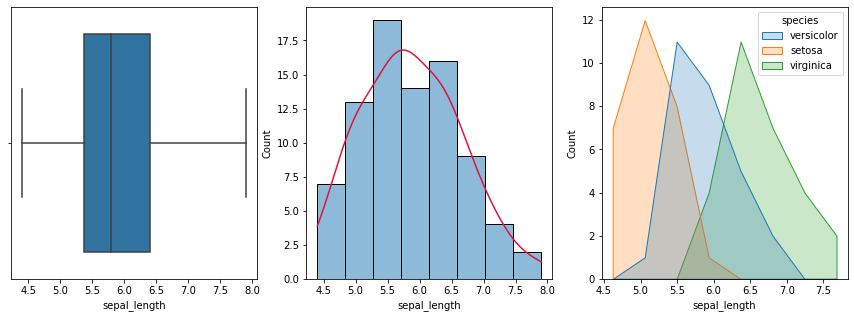

sepal_width
count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


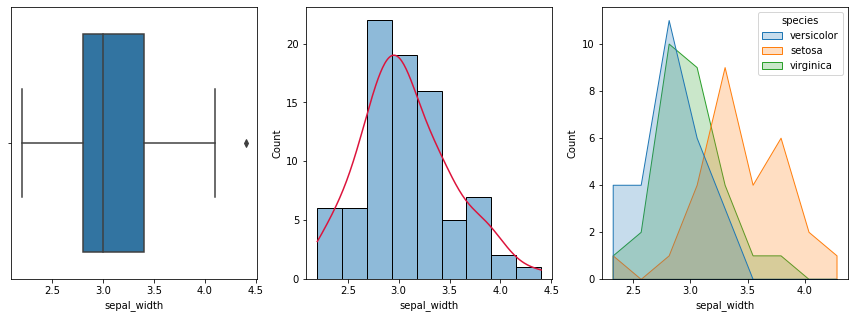

petal_length
count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


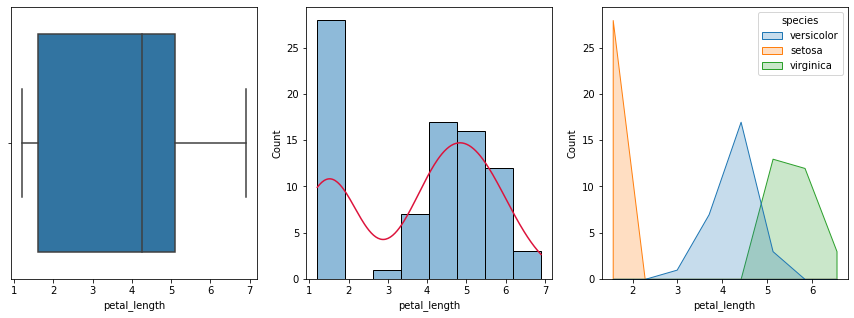

petal_width
count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


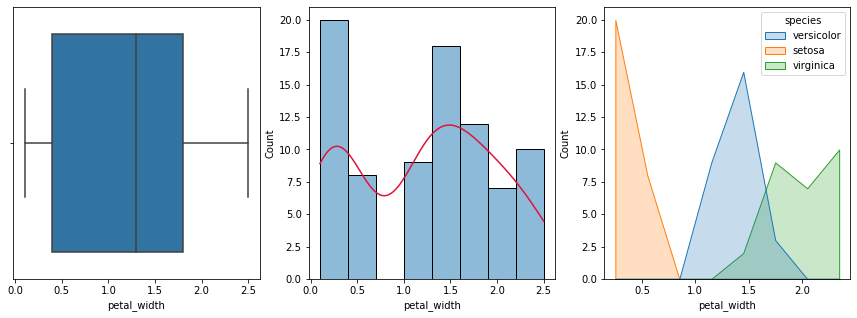

In [218]:
# create describe, boxplot, histplot

for col in num_vars:
    fig, ax1 = plt.subplots(1,3, figsize=(15,5)) 
    print(col)
    print(train[col].describe())
    sns.boxplot(x=col, data=train,ax=ax1[0],)
    
    graph=sns.histplot(x=col, data=train,ax=ax1[1],kde=True)
    graph.lines[0].set_color('crimson')
    
    sns.histplot(x=col, data= train,ax=ax1[2],hue='species', element='poly')
    
    plt.show()

* For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [219]:
# frequency table
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

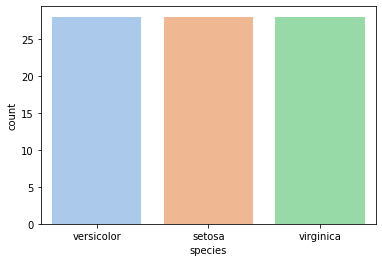

In [220]:
# bar plot
sns.countplot(x='species', data=train, palette='pastel')

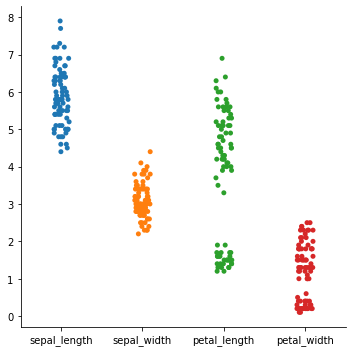

In [221]:
sns.catplot(data=train)

* Document takeaways & any actions.

train data is evenly distributed.
Sepal length and petal length are larger and have more spread
There is some sepeartion in the data of pedal length and pedal width

### 3. Bivariate Stats
* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

* For each measurement type, compute the descriptive statistics for each species.

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

* Document takeaways & any actions.

* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

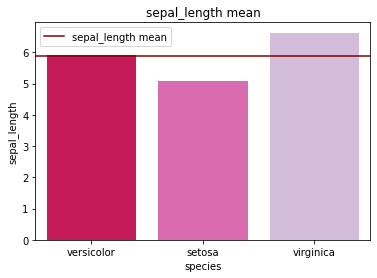

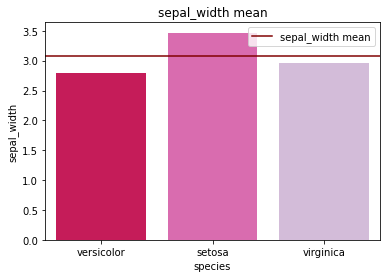

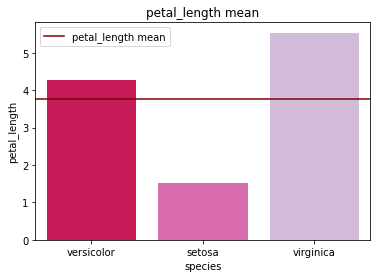

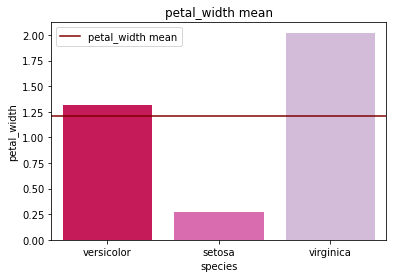

In [222]:
for col in num_vars:
    plt.title(f'{col} mean')
    sns.barplot(x='species', y = col, data = train,ci=False,saturation=.9, palette="PuRd_r")
    col_mean= train[col].mean()
    plt.axhline(col_mean, label = f'{col} mean',color='maroon')
    plt.legend()
    plt.show()
    

* For each measurement type, compute the descriptive statistics for each species.

In [223]:
for col in num_vars:
    print(col)
    print('_____________________')
    print(train[col].describe())
    print('                     ')
    print('                     ')
    


sepal_length
_____________________
count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
                     
                     
sepal_width
_____________________
count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64
                     
                     
petal_length
_____________________
count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
                     
                     
petal_width
_____________________
count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width,

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

variables:
* mean petal width: numeric, continuous

* species(virginica & versicolor): categorical, discrete

Test: Two independent samples, Mann-Whitney's test

$H_0$:The mean petal width of virginica == The mean petal width of versicolor

$H_a$:The mean petal width of virginica != The mean petal width of versicolor

In [224]:
# alpha significance level
alpha = 0.05

In [232]:
train.petal_width[train.species=='versicolor']

79    1.0
95    1.2
91    1.4
82    1.2
52    1.5
97    1.3
70    1.8
51    1.5
57    1.0
53    1.3
69    1.1
87    1.3
67    1.0
92    1.2
96    1.3
89    1.3
83    1.6
84    1.5
74    1.3
61    1.5
81    1.0
58    1.3
54    1.5
94    1.3
88    1.3
85    1.6
55    1.3
73    1.2
Name: petal_width, dtype: float64

In [239]:

stats.mannwhitneyu((train.petal_width[train.species=='virginica'], train.petal_width[train.species=='versicolor'], alternative='two-sided')


SyntaxError: invalid syntax (3274444435.py, line 1)

* Document takeaways & any actions.

### 4. Multivariate Stats
* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

* Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

* Document takeaways and any actions.

# Part II
Explore your titanic dataset more completely.

* Determine drivers of the target variable
* Determine if certain columns should be dropped
* Determine if it would be valuable to bin some numeric columns
* Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

# Part III

Explore your telco data to discover drivers of churn

* Determine if certain columns should be dropped
* Determine if it would be valuable to bin some numeric columns
* Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.